In [1]:
import pandas as pd
import numpy as np
import os
import sys

if __name__ == "__main__":
    '''Modulo principal para correr todos los códigos'''
    
    from DATA_LLENADO import llenado
    from DATA_COMPLETA import completar_data
    from GRAFICAR_DATOS_FALTANTES import datos_faltantes
    from GRAFICAR_CORRELACION import correlacion
    from CORRECCION_DATA import correccion
    from PRUEBA_HOMOGENEIDAD import test_pettitt
    from BOXPLOT import boxplots
    from MENSUAL_MULTIANUAL import mensual_multianual
    from CURVAS_DOBLE_MASA import curvas_doble_masa
    from BXP_COMPARACION import bxp_mes
    from BXP_COMPARACION import bxp_anio
    from OUTLIERS import walsh_test
    from LLENADO_V2 import llenar_datos
    from TENDENCIA import mann_kendall


    rango_tiempo = ['1995-01-01','2023-06-30']   #Fechas del periodo de tiempo a evaluar
    var = 'PRE'   # Variable a evaluar. Si es precipitación marcar como 'PRE', si es temperatura marcar como 'TEM'
    file_data = "../datos/"  #Carpeta de ubicación de los datos, cada estación en un csv por separado, el nombre del csv es el mismo de la estación
    
    lista_files = [i for i in os.listdir(file_data) if i != '.DS_Store']  #Seleccionar CSVs y excluir archivo oculto de macOS.
    
    #llenado(file_data, lista_files,rango_tiempo,var)
    #completar_data(file_data, lista_files,rango_tiempo,var)
    #llenar_datos(lista_files)
    grafico_datos_faltantes = datos_faltantes(lista_files,rango_tiempo,var)
    grafico_correlacion     = correlacion(lista_files,rango_tiempo,var)
    walsh_test(lista_files,var)
    correccion(lista_files,rango_tiempo,var) 
    grafico_test_pettitt    = test_pettitt(lista_files,var)
    grafico_boxplots        = boxplots(lista_files,var) 
    grafico_mm_estaciones   = mensual_multianual(lista_files,'estaciones',var)
    grafico_mm_global       = mensual_multianual(lista_files,'global',var)
    grafico_c_doble_masa    = curvas_doble_masa(lista_files) #Solo para precipitación
    grafico_bxp_mes         = bxp_mes(lista_files) #Solo para precipitación
    grafico_bxp_anio        = bxp_anio(lista_files) #Solo para precipitación
    grafico_tendencia       = mann_kendall(lista_files,var)

In [5]:
import os
rango_tiempo = ['1995-01-01','2023-06-30']   #Fechas del periodo de tiempo a evaluar
var = 'PRE'   # Variable a evaluar. Si es precipitación marcar como 'PRE', si es temperatura marcar como 'TEM'
file_data = "../datos/"  #Carpeta de ubicación de los datos, cada estación en un csv por separado, el nombre del csv es el mismo de la estación
    
lista_files = [i for i in os.listdir(file_data) if i != '.DS_Store']  #Seleccionar CSVs y excluir archivo oculto de macOS.

In [21]:
import pandas as pd
data = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/LA MINA CERREJON  - AUT [15065501].csv'); data = data[['Fecha', 'Valor']]; data = data.set_index('Fecha');data.index = pd.to_datetime(data.index)

In [2]:
import pandas as pd
import numpy as np
import os
import sys

rango_tiempo = ['1995-01-01','2023-06-30']   #Fechas del periodo de tiempo a evaluar
var = 'PRE'   # Variable a evaluar. Si es precipitación marcar como 'PRE', si es temperatura marcar como 'TEM'
file_data = "../datos/"  #Carpeta de ubicación de los datos, cada estación en un csv por separado, el nombre del csv es el mismo de la estación
    
lista_files = [i for i in os.listdir(file_data) if i != '.DS_Store']

In [2]:
data = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/LA MINA CERREJON  - AUT [15065501].csv'); data = data[['Fecha', 'Valor']]; data = data.set_index('Fecha');data.index = pd.to_datetime(data.index)

In [22]:
data = pd.read_csv('../PRE_SALIDAS/DATA_LLENADO/LA MINA CERREJON  - AUT [15065501].csv'); data = data[['Fecha', 'Valor']]; data = data.set_index('Fecha');data.index = pd.to_datetime(data.index)
data["mes"] = data.index.strftime("%b")
meses = list(data["mes"].unique())

In [92]:
#prueba para saber si walsh fuciona con datos creados
import numpy as np

# Crear una lista con 100 valores aleatorios que sigan una distribución normal
mu, sigma = 0, 1  # media y desviación estándar
n = 100
data_normal = np.random.normal(mu, sigma, n)

# Introducir 3 datos atípicos
outliers = [10, -5, 15]  # Valores de los datos atípicos
for outlier in outliers:
    index = np.random.randint(0, n)  # Elegir una posición aleatoria en la lista
    data_normal[index] = outlier  # Reemplazar el valor en esa posición con el dato atípico

print(data_normal)

[ 5.78533267e-01  1.35851173e+00 -1.61580867e-01  6.40578192e-01
  1.06830301e+00  1.25707290e-01 -7.76656432e-01 -1.92758114e-01
  5.04336899e-01 -5.32186439e-02 -5.10985915e-01  5.45219722e-01
  9.76149652e-02 -5.84117219e-01  1.61335462e+00  7.28896285e-01
  1.86508897e+00  6.83869397e-02 -1.53095047e+00 -1.24361821e+00
 -2.99467664e-01 -1.48802643e+00 -3.76587116e-01  7.15684197e-01
  5.11082589e-01 -3.10155633e-01 -1.45496793e-01  8.94508611e-01
  4.34623270e-01 -5.02742701e-01  4.27154525e-01  2.89199466e-01
 -1.07547835e+00  1.65250111e+00 -6.36501128e-02  3.16765228e-01
  9.92567770e-02 -1.50252477e+00  4.07932369e-01  5.38583862e-01
 -2.86977473e-01  2.48095067e-01  8.38702026e-02 -2.20543544e+00
 -3.67388902e-01 -1.73089235e-01 -8.49419887e-01 -8.49929493e-01
  7.24262530e-01  2.03797299e+00  7.91521640e-01 -3.45597202e-01
  3.00646735e-02 -7.70458205e-02  1.08572035e+00  1.00000000e+01
  8.97949948e-01  3.69764980e-01 -7.98587934e-01 -1.35881037e+00
  1.50000000e+01  1.09056

Multiple linear regression (MLR)
Multiple imputation (MI)
Nonlinear iterative partial least squares (NIPALS) algorithm for missing data (NIPALS)
Expectation maximization (EM)
Modified correlation coefficient with inverse distance weighting (MCCIDW)
Modified old normal ratio with inverse distance (ONRID)
Normal ratio inverse distance weighting with correlation (NRIDC) *
https://link.springer.com/article/10.1007/s12517-022-10995-6/tables/4


https://iwaponline.com/hr/article/48/4/1032/1542/Assessment-of-different-methods-for-estimation-of

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

# Datos de ejemplo: precipitación por estación
# Aquí suponemos que los datos faltantes están representados por NaN
data = np.array([[0.2, 0.3, np.nan, 0.1],
                 [np.nan, 0.5, 0.6, 0.4],
                 [0.8, np.nan, 0.9, 1.0]])

# Inicializar un imputador simple para rellenar los valores faltantes con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputar valores faltantes usando la media
data_imputed = imputer.fit_transform(data)

# Inicializar y ajustar un modelo de mezcla gaussiana (EM) para estimar la distribución de los datos
# Suponemos que los datos siguen una distribución gaussiana
em_model = GaussianMixture(n_components=2, random_state=42)
em_model.fit(data_imputed)

# Crear una máscara de valores faltantes
missing_mask = np.isnan(data)

# Imputar valores faltantes usando el modelo EM
data_imputed_with_em = data_imputed.copy()
for i in range(data_imputed.shape[1]):
    missing_indices = np.where(missing_mask[:, i])[0]
    if len(missing_indices) > 0:
        imputed_values = em_model.predict(data_imputed_with_em[missing_indices, :].reshape(-1, data_imputed.shape[1]))
        data_imputed_with_em[missing_indices, i] = imputed_values

print("Datos originales:")
print(data)
print("\nDatos imputados usando la media:")
print(data_imputed)
print("\nDatos imputados usando EM:")
print(data_imputed_with_em)



Datos originales:
[[0.2 0.3 nan 0.1]
 [nan 0.5 0.6 0.4]
 [0.8 nan 0.9 1. ]]

Datos imputados usando la media:
[[0.2  0.3  0.75 0.1 ]
 [0.5  0.5  0.6  0.4 ]
 [0.8  0.4  0.9  1.  ]]

Datos imputados usando EM:
[[0.2 0.3 0.  0.1]
 [0.  0.5 0.6 0.4]
 [0.8 1.  0.9 1. ]]


In [20]:
a = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/LA MINA CERREJON  - AUT [15065501].csv')
b = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/POZO HONDO [15067130].csv')
c = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/CAMP INTERCOR [15065050].csv')

In [21]:
a = a['Valor'].values.tolist()
b = b['Valor'].values.tolist()
c = c['Valor'].values.tolist()

In [58]:
#correccioc
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

# Datos de ejemplo: precipitación por estación
# Aquí suponemos que los datos faltantes están representados por NaN
data = np.array([a[:1000],
                 b[:1000],
                 c[:1000]])

# Inicializar un imputador simple para rellenar los valores faltantes con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputar valores faltantes usando la media
data_imputed = imputer.fit_transform(data)

# Inicializar y ajustar un modelo de mezcla gaussiana (EM) para estimar la distribución de los datos
# Suponemos que los datos siguen una distribución gaussiana
em_model = GaussianMixture(n_components=2, random_state=42)
em_model.fit(data_imputed)

# Crear una máscara de valores faltantes
missing_mask = np.isnan(data)

# Imputar valores faltantes usando el modelo EM
data_imputed_with_em = data_imputed.copy()
for i in range(data_imputed.shape[1]):
    missing_indices = np.where(missing_mask[:, i])[0]
    if len(missing_indices) > 0:
        imputed_values = em_model.sample(len(missing_indices))[0]  # Sample from the EM model
        data_imputed_with_em[missing_indices, i] = imputed_values[:, i]

print("Datos originales:")
print(data)
print("\nDatos imputados usando la media:")
print(data_imputed)
print("\nDatos imputados usando EM:")
print(data_imputed_with_em)


Datos originales:
[[ 0.   0.   0.  ...  0.   0.   7.1]
 [ 0.   0.   0.  ...  0.  18.   0. ]
 [ 0.   0.   0.  ...  0.   0.   2. ]]

Datos imputados usando la media:
[[ 0.   0.   0.  ...  0.   0.   7.1]
 [ 0.   0.   0.  ...  0.  18.   0. ]
 [ 0.   0.   0.  ...  0.   0.   2. ]]

Datos imputados usando EM:
[[ 0.   0.   0.  ...  0.   0.   7.1]
 [ 0.   0.   0.  ...  0.  18.   0. ]
 [ 0.   0.   0.  ...  0.   0.   2. ]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [2]:
a = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/LA MINA CERREJON  - AUT [15065501].csv',index_col='Fecha');
b = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/POZO HONDO [15067130].csv',index_col='Fecha')
c = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/CAMP INTERCOR [15065050].csv',index_col='Fecha')

a.rename(columns={'Valor':'EstA'},inplace=True)
b.rename(columns={'Valor':'EstB'},inplace=True)
c.rename(columns={'Valor':'EstC'},inplace=True)

In [31]:
dataframes = []
numi = 0

for i in np.arange(numi,len(lista_files),1):  #llamar datos de las estaciones
    data_est = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/' + lista_files[i]); data_est = data_est[['Fecha', 'Valor']]; data_est = data_est.set_index('Fecha');data_est.index = pd.to_datetime(data_est.index)
    data_est.rename(columns={'Valor':lista_files[i][:-4]},inplace=True)
    dataframes.append(data_est)
    
data = pd.concat(dataframes,axis=1)

In [4]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    radio_tierra = 6371.0
    
    # Convertir grados a radianes
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Diferencia de latitud y longitud
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Calcular la distancia usando la fórmula haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distancia = radio_tierra * c
    
    return distancia

def estaciones_mas_cercanas(lat_punto, lon_punto, estaciones):
    # Calcular distancias entre el punto en especifico y todas las otras estaciones
    distancias = []
    for estacion, (lat, lon) in estaciones.items():
        distancia = haversine(lat_punto, lon_punto, lat, lon)
        distancias.append((distancia, estacion))
    
    # Ordenar las distancias de menor a mayor
    distancias.sort()
    
    # Tomar los nombres de las dos estaciones más cercanas
    estacion1 = distancias[0][1]
    estacion2 = distancias[1][1]
    
    return estacion1, estacion2

# Ejemplo de uso
punto_en_especifico = (40.7128, -74.0060)  # Latitud y longitud del punto en especifico
estaciones = {'Estacion1': (34.0522, -118.2437), 'Estacion2': (37.7749, -122.4194), 'Estacion3': (41.8781, -87.6298), 'Estacion4': (51.5074, -0.1278)}

estacion1, estacion2 = estaciones_mas_cercanas(punto_en_especifico[0], punto_en_especifico[1], estaciones)
print("Las dos estaciones más cercanas al punto en especifico son:", estacion1, "y", estacion2)


Las dos estaciones más cercanas al punto en especifico son: Estacion3 y Estacion1


In [28]:
for i in np.arange(numi,len(lista_files),1):  #llamar datos de las estaciones
    print(i)

0
1
2


In [54]:
data.columns.to_list()

['CAMP INTERCOR [15065050]',
 'LA MINA CERREJON  - AUT [15065501]',
 'POZO HONDO [15067130]']

In [56]:
len(coor_estaciones)

2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

dataframes = []
numi = 0
coor_estaciones = {}

for i in np.arange(numi,len(lista_files),1):  #llamar datos de las estaciones
    data_est = pd.read_csv('../PRE_SALIDAS/DATA_COMPLETA/' + lista_files[i])
    data_coor = pd.read_csv('../datos/' + lista_files[i])
    lat = data_coor["Latitud"][i]
    lon = data_coor["Longitud"][i]
    coor_estaciones[lista_files[i][:-4]] = (lat,lon)
    data_est = data_est[['Fecha', 'Valor']]; data_est = data_est.set_index('Fecha');data_est.index = pd.to_datetime(data_est.index)
    data_est.rename(columns={'Valor':lista_files[i][:-4]},inplace=True)
    dataframes.append(data_est)

    
data_total = pd.concat(dataframes,axis=1) # Asignar todos los datos de las estaciones a un solo dataframe
name_estaciones = data_total.columns.to_list()
data_llena1 = data_total.copy()

for estacion in name_estaciones:
    data = data_total.copy()
    data_estacion = data[[estacion]]
    data_select = data.drop(estacion,axis=1)   
    # Calcula el número mínimo de valores no nulos requeridos
    min_non_nulls = len(data_select) * 0.8
    # Selecciona las columnas que tienen menos del 20% de valores NaN
    df_filtrado = data_select.dropna(axis=1, thresh=min_non_nulls)
    #print(len(df_filtrado.columns))
    
    if len(df_filtrado.columns) < 2:
        #print("No hay estaciones suficientes para: ", estacion)
        continue
        
    est_confiables = df_filtrado.columns.to_list()
    coor_estacion = coor_estaciones[estacion]
    dic_filtrado = {clave: valor for clave, valor in coor_estaciones.items() if clave in est_confiables}
    estacion2, estacion3 = estaciones_mas_cercanas(coor_estacion[0], coor_estacion[1], dic_filtrado)

    
    data = data[[estacion, estacion2, estacion3]]
    data_not_nan = data.dropna()   #elimina los valores nan para que solo queden los datos de entrenamiento
    x_train = data_not_nan.copy()
    x_train = x_train.drop(estacion, axis=1)    
    y_train = data_not_nan[[estacion]]
    y_train= np.ravel(y_train[estacion])
    
    #lim = int(len(data_not_nan)*0.8) # lineas para probar el modelo
    # x_train = data_not_nan[['EstA','EstB']][:lim]
    # y_train = data_not_nan[['EstC']][:lim].values.flatten()
    
    scaler = StandardScaler(with_mean=True, with_std=True).fit(x_train.values)
    
    xTrainScaled = scaler.transform(x_train)
    
    regr = MLPRegressor(random_state=1,max_iter=5000).fit(xTrainScaled,y_train)
    
    
    #x_test = data_not_nan[['EstA','EstB']][lim:] #solo activar si se va a evaluar el modelo
    #x_testScaled = scaler.transform(x_test)
    
    # Selecciona los datos para llenar, las dos primeras condiciones seleccionan el input y la tercera indica los datos que deben ser llenados
    filas_llenar = data.loc[(~data[estacion2].isnull()) & (~data[estacion3].isnull()) & (data[estacion].isnull())].copy()
    x_test = filas_llenar[[estacion2,estacion3]]    #ajustar nomrbes de columnas
    x_testScaled = scaler.transform(x_test)
    
    yPredict = regr.predict(x_testScaled)  #Se realiza la prediccion
    
    df_pred = pd.DataFrame(yPredict, index=filas_llenar.index,columns=[estacion])
    
    data_llena1.loc[df_pred.index,estacion] = df_pred[estacion]

impute_it = IterativeImputer()
pred_II = impute_it.fit_transform(data_llena1)
data_llena_final = pd.DataFrame(pred_II, index=data.index, columns=data_llena1.columns)


for columna in data_llena_final.columns:
    # Crea DataFrame para cada estacion por separado
    df_temporal = pd.DataFrame(data_llena_final[columna], columns=[columna])
    df_temporal.reset_index(inplace=True)
    ruta = "../PRE_SALIDAS/DATA_LLENADO_V2/"
    if not os.path.exists(ruta):
        os.makedirs(ruta)
    #df_temporal.to_csv(f"{ruta}/{columna}.csv", index=False)

# data_not_nan = data.dropna()   #eliminar los valores nan para que solo queden los datos de entrenamiento
# x_train = data_not_nan.copy()
# x_train = x_train.drop('CAMP INTERCOR [15065050]', axis=1)    #    AJUSTAR PARA QUE CAMBI ESTACION
# y_train = data_not_nan[['CAMP INTERCOR [15065050]']]
# y_train= np.ravel(y_train["CAMP INTERCOR [15065050]"])

# #lim = int(len(data_not_nan)*0.8) # lineas para probar el modelo
# # x_train = data_not_nan[['EstA','EstB']][:lim]
# # y_train = data_not_nan[['EstC']][:lim].values.flatten()

# scaler = StandardScaler(with_mean=True, with_std=True).fit(x_train.values)

# xTrainScaled = scaler.transform(x_train)

# regr = MLPRegressor(random_state=1,max_iter=5000).fit(xTrainScaled,y_train)


# #x_test = data_not_nan[['EstA','EstB']][lim:] #solo activar si se va a evaluar el modelo
# #x_testScaled = scaler.transform(x_test)

# # Selecciona los datos para llenar, las dos primeras condiciones seleccionan el input y la tercera indica los datos que deben ser llenados
# filas_llenar = data.loc[(~data['POZO HONDO [15067130]'].isnull()) & (~data['LA MINA CERREJON  - AUT [15065501]'].isnull()) & (data['CAMP INTERCOR [15065050]'].isnull())].copy()
# x_test = filas_llenar[['LA MINA CERREJON  - AUT [15065501]','POZO HONDO [15067130]']]    #ajustar nomrbes de columnas
# x_testScaled = scaler.transform(x_test)

# yPredict = regr.predict(x_testScaled)  #Se realiza la prediccion

# df_pred = pd.DataFrame(yPredict, index=filas_llenar.index,columns=['CAMP INTERCOR [15065050]'])

# data_llena = data.copy()
# data_llena.loc[df_pred.index,'CAMP INTERCOR [15065050]'] = df_pred['CAMP INTERCOR [15065050]']

C:\Users\AilinCabrera\anaconda3\envs\hid2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\AilinCabrera\anaconda3\envs\hid2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\AilinCabrera\anaconda3\envs\hid2\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [10]:
df_temporal.reset_index(inplace=True)

In [87]:
data_llena_final

,CAMP INTERCOR [15065050],LA MINA CERREJON - AUT [15065501],POZO HONDO [15067130]
Fecha,,,
1995-01-01,0.000000,0.000000,0.0
1995-01-02,0.000000,0.000000,0.0
1995-01-03,0.000000,0.000000,0.0
1995-01-04,0.000000,0.000000,0.0
1995-01-05,0.000000,0.000000,0.0
...,...,...,...
2023-06-26,38.435100,50.900000,0.0
2023-06-27,0.405499,0.000000,0.0
2023-06-28,2.626985,1.876063,0.0


In [ ]:
#FINAL PARTE 2
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

impute_it = IterativeImputer()
pred_II = impute_it.fit_transform(data_llena)
df_pred_II = pd.DataFrame(pred_II, index=data.index, columns=data_llena.columns)

In [3]:
data = pd.concat([a,b,c],axis=1)
data.index = pd.to_datetime(data.index)

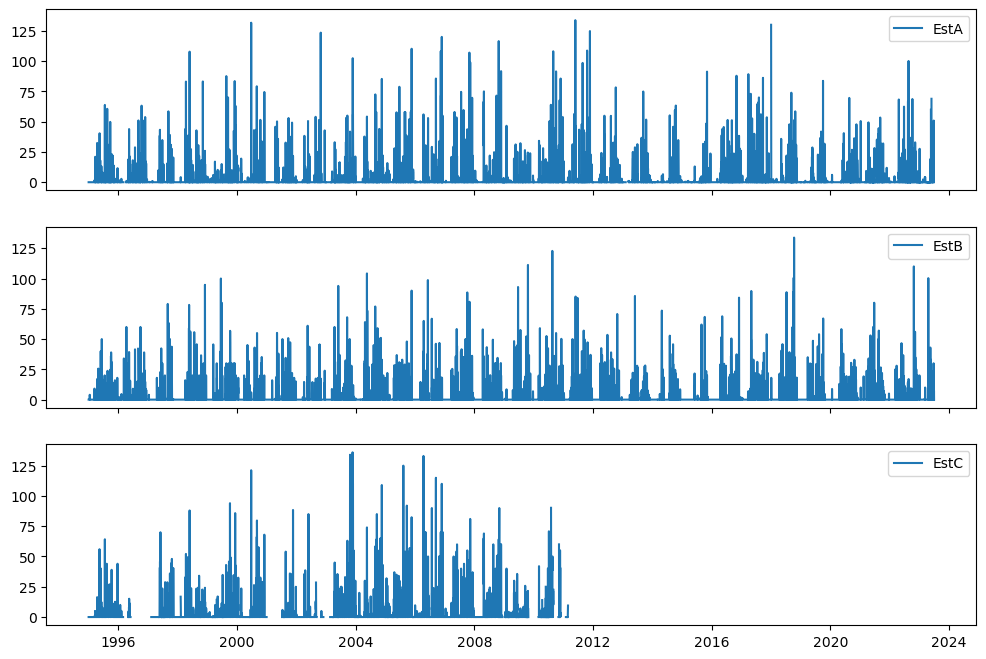

In [4]:
fig, axs = plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(data.index,data['EstA'],label='EstA')
axs[0].legend()
axs[1].plot(data.index,data['EstB'],label='EstB')
axs[1].legend()
axs[2].plot(data.index,data['EstC'],label='EstC')
axs[2].legend()
plt.show()

In [5]:
data_not_nan = data.dropna()

lim = int(len(data_not_nan)*0.8)

In [72]:
x_train = data_not_nan[['EstA','EstB']][:lim]
y_train = data_not_nan[['EstC']][:lim].values.flatten()

scaler = StandardScaler(with_mean=True, with_std=True).fit(x_train.values)

xTrainScaled = scaler.transform(x_train)

regr = MLPRegressor(random_state=1,max_iter=5000).fit(xTrainScaled,y_train)


x_test = data_not_nan[['EstA','EstB']][lim:]#.dropna()
x_testScaled = scaler.transform(x_test)
# x_test = data[['EstA','EstB']].dropna()
# x_testScaled = scaler.transform(x_test)


/Users/ailindaiana/anaconda3/envs/hidro/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/ailindaiana/anaconda3/envs/hidro/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [73]:
yPredict = regr.predict(x_testScaled)

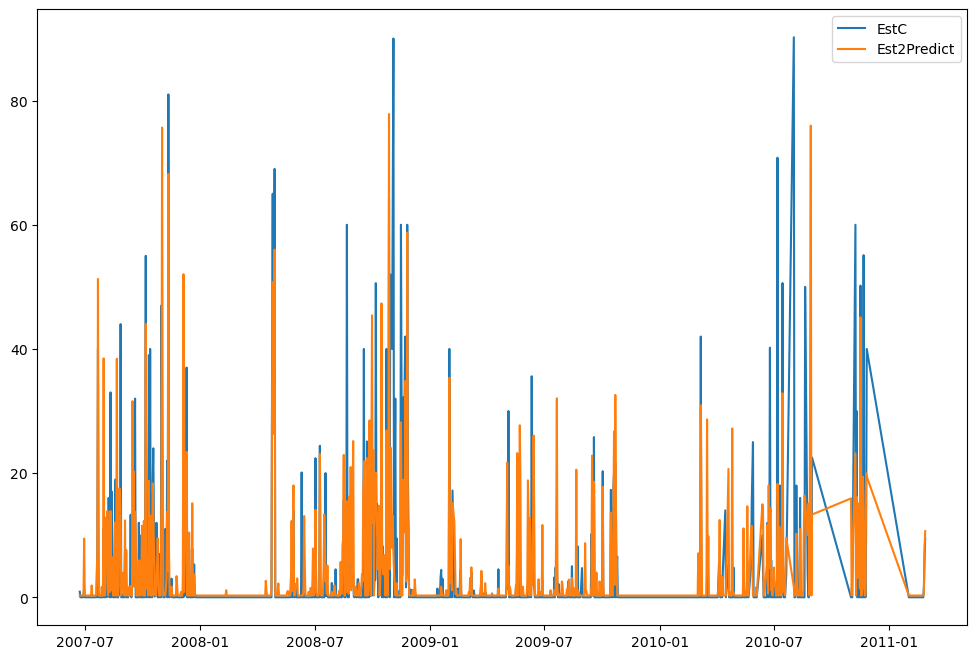

In [75]:
fig, ax = plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(data_not_nan[lim:].index,data_not_nan['EstC'][lim:],label='EstC')
ax.plot(x_test.index,yPredict,label='Est2Predict')
plt.legend()
plt.show()

METODO 2 (NO SELECCIONADO) KNNImputer

In [80]:
from sklearn.impute import KNNImputer

In [81]:
data

,EstA,EstB,EstC
Fecha,,,
1995-01-01,0.0,0.0,0.0
1995-01-02,0.0,0.0,0.0
1995-01-03,0.0,0.0,0.0
1995-01-04,0.0,0.0,0.0
1995-01-05,0.0,0.0,0.0
...,...,...,...
2023-06-26,50.9,0.0,NaN
2023-06-27,0.0,0.0,NaN
2023-06-28,NaN,0.0,NaN


In [112]:
impute_knn = KNNImputer(n_neighbors=3)
pred = impute_knn.fit_transform(data)

In [113]:
pred[10403]

array([50.9,  0. ,  0. ])

In [114]:
np.nanmean(data)

2.6571490348704643

In [115]:
np.sum(np.isnan(pred))

0

In [116]:
np.mean(pred)

2.447367409684858

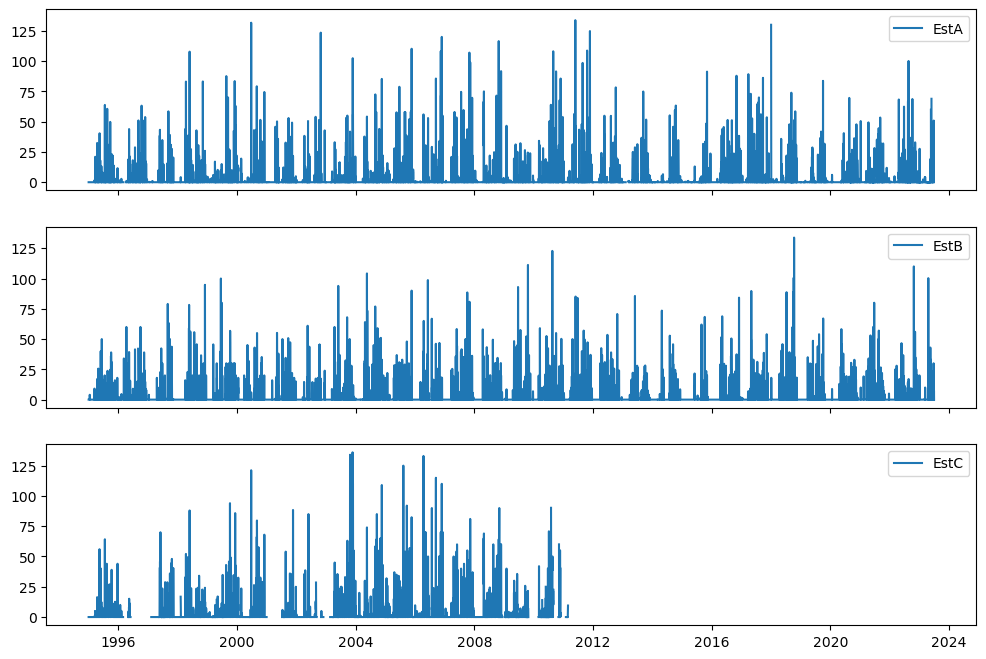

In [101]:
fig, axs = plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(data.index,data['EstA'],label='EstA')
axs[0].legend()
axs[1].plot(data.index,data['EstB'],label='EstB')
axs[1].legend()
axs[2].plot(data.index,data['EstC'],label='EstC')
axs[2].legend()
plt.show()

In [108]:
df_pred = pd.DataFrame(pred,index=data.index, columns=data.columns)

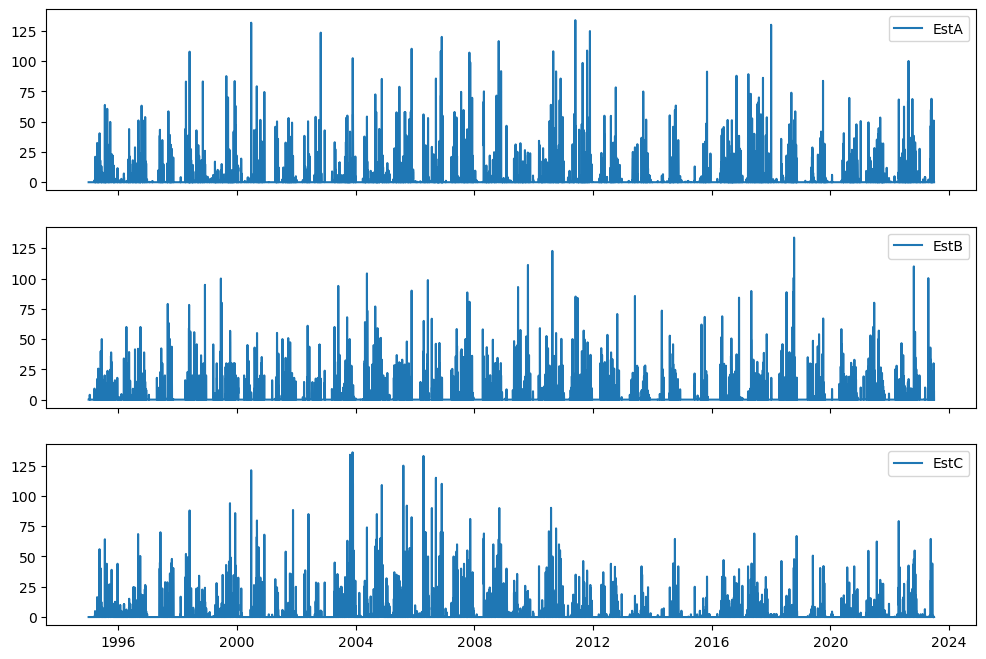

In [117]:
fig, axs = plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(df_pred.index,df_pred['EstA'],label='EstA')
axs[0].legend()
axs[1].plot(df_pred.index,df_pred['EstB'],label='EstB')
axs[1].legend()
axs[2].plot(df_pred.index,df_pred['EstC'],label='EstC')
axs[2].legend()
plt.show()

METODO 2 (SELECCIONADO) = IterativeImputer

In [4]:
data

,EstA,EstB,EstC
Fecha,,,
1995-01-01,0.0,0.0,0.0
1995-01-02,0.0,0.0,0.0
1995-01-03,0.0,0.0,0.0
1995-01-04,0.0,0.0,0.0
1995-01-05,0.0,0.0,0.0
...,...,...,...
2023-06-26,50.9,0.0,NaN
2023-06-27,0.0,0.0,NaN
2023-06-28,NaN,0.0,NaN


In [51]:
data_llena

,CAMP INTERCOR [15065050],LA MINA CERREJON - AUT [15065501],POZO HONDO [15067130]
Fecha,,,
1995-01-01,0.000000,0.0,0.0
1995-01-02,0.000000,0.0,0.0
1995-01-03,0.000000,0.0,0.0
1995-01-04,0.000000,0.0,0.0
1995-01-05,0.000000,0.0,0.0
...,...,...,...
2023-06-26,38.435100,50.9,0.0
2023-06-27,0.405499,0.0,0.0
2023-06-28,NaN,NaN,0.0


In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

impute_it = IterativeImputer()
pred_II = impute_it.fit_transform(data_llena)
df_pred_II = pd.DataFrame(pred_II, index=data.index, columns=data_llena.columns)

C:\Users\AilinCabrera\anaconda3\envs\hidv2\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [69]:
df_pred_II = pd.DataFrame(pred_II, index=data.index, columns=data_llena.columns)

In [70]:
df_pred_II.columns.unique()

Index(['CAMP INTERCOR [15065050]', 'LA MINA CERREJON  - AUT [15065501]',
       'POZO HONDO [15067130]'],
      dtype='object')

In [71]:
df_pred_II = df_pred_II[["CAMP INTERCOR [15065050]",'LA MINA CERREJON  - AUT [15065501]',"POZO HONDO [15067130]"]]

<Axes: xlabel='Fecha'>

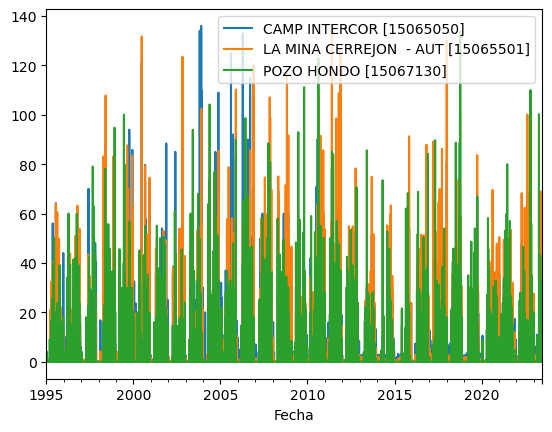

In [72]:
df_pred_II.plot()

In [53]:
data

,CAMP INTERCOR [15065050],LA MINA CERREJON - AUT [15065501],POZO HONDO [15067130]
Fecha,,,
1995-01-01,0.0,0.0,0.0
1995-01-02,0.0,0.0,0.0
1995-01-03,0.0,0.0,0.0
1995-01-04,0.0,0.0,0.0
1995-01-05,0.0,0.0,0.0
...,...,...,...
2023-06-26,NaN,50.9,0.0
2023-06-27,NaN,0.0,0.0
2023-06-28,NaN,NaN,0.0


In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

impute_it = IterativeImputer()
pred_II = impute_it.fit_transform(data)

In [55]:
pred_II

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [2.71238064, 1.87592104, 0.        ],
       [1.72759469, 0.        , 7.4       ],
       [2.71238064, 1.87592104, 0.        ]])

In [56]:
df_pred_II = pd.DataFrame(pred_II, index=data.index, columns=data.columns)

In [57]:
df_pred_II

,CAMP INTERCOR [15065050],LA MINA CERREJON - AUT [15065501],POZO HONDO [15067130]
Fecha,,,
1995-01-01,0.000000,0.000000,0.0
1995-01-02,0.000000,0.000000,0.0
1995-01-03,0.000000,0.000000,0.0
1995-01-04,0.000000,0.000000,0.0
1995-01-05,0.000000,0.000000,0.0
...,...,...,...
2023-06-26,37.782493,50.900000,0.0
2023-06-27,1.370412,0.000000,0.0
2023-06-28,2.712381,1.875921,0.0


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

impute_it = IterativeImputer()
pred_II = impute_it.fit_transform(data)

In [8]:
df_pred_II = pd.DataFrame(pred_II, index=data.index, columns=data.columns)

In [9]:
df_pred_II

,EstA,EstB,EstC
Fecha,,,
1995-01-01,0.000000,0.0,0.000000
1995-01-02,0.000000,0.0,0.000000
1995-01-03,0.000000,0.0,0.000000
1995-01-04,0.000000,0.0,0.000000
1995-01-05,0.000000,0.0,0.000000
...,...,...,...
2023-06-26,50.900000,0.0,37.782493
2023-06-27,0.000000,0.0,1.370412
2023-06-28,1.875921,0.0,2.712381


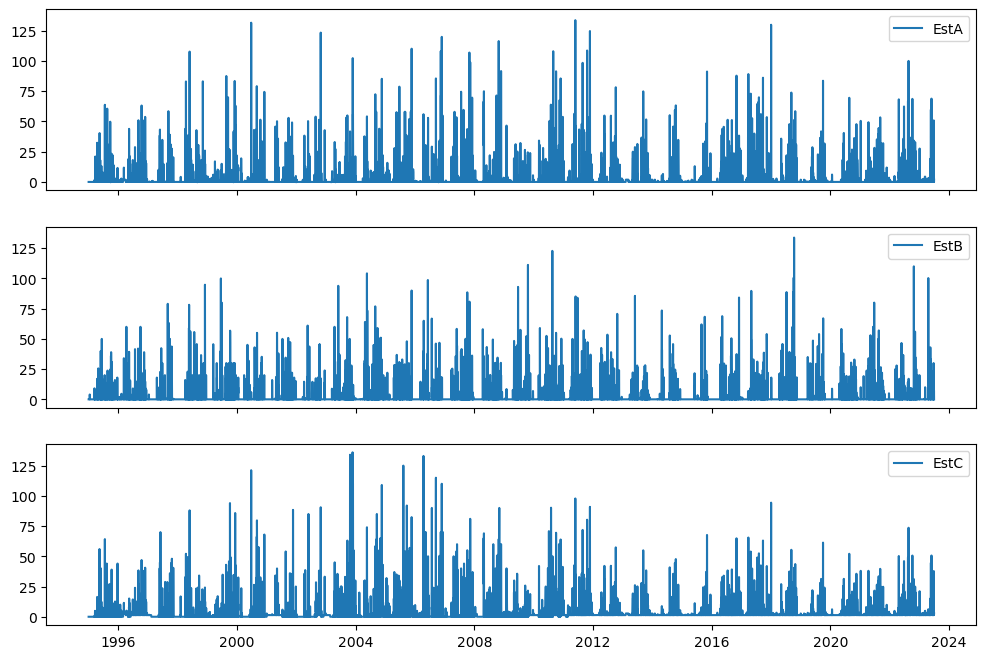

In [125]:
fig, axs = plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(df_pred_II.index,df_pred_II['EstA'],label='EstA')
axs[0].legend()
axs[1].plot(df_pred_II.index,df_pred_II['EstB'],label='EstB')
axs[1].legend()
axs[2].plot(df_pred_II.index,df_pred_II['EstC'],label='EstC')
axs[2].legend()
plt.show()